In [7]:
SCOPETYPE = 'CWNANO'
PLATFORM = 'CWNANO'
CRYPTO_TARGET='TINYAES128C' 
SS_VER='SS_VER_2_1'

In [8]:
%run "../../Setup_Scripts/Setup_Generic.ipynb"

INFO: Caught exception on reconnecting to target - attempting to reconnect to scope first.
INFO: This is a work-around when USB has died without Python knowing. Ignore errors above this line.
INFO: Found ChipWhisperer😍


In [9]:
%%bash -s "$PLATFORM" "$CRYPTO_TARGET" "$SS_VER"
cd ../../../firmware/mcu/simpleserial-aes
make PLATFORM=$1 CRYPTO_TARGET=$2 SS_VER=$3 -j

Building for platform CWNANO with CRYPTO_TARGET=TINYAES128C
SS_VER set to SS_VER_2_1
SS_VER set to SS_VER_2_1
Blank crypto options, building for AES128
arm-none-eabi-gcc (15:13.2.rel1-2) 13.2.1 20231009
Copyright (C) 2023 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.

mkdir -p objdir-CWNANO 
.
Welcome to another exciting ChipWhisperer target build!!
.
.
.
.
.
.
Compiling:
Compiling:
.
Compiling:
Compiling:
Compiling:
Compiling:
.
-en     simpleserial-aes.c ...
-en     .././simpleserial/simpleserial.c ...
-en     .././hal/hal.c ...
Compiling:
-en     .././hal//stm32f0_nano/stm32f0_hal_nano.c ...
-en     .././hal//stm32f0/stm32f0_hal_lowlevel.c ...
Assembling: .././hal//stm32f0/stm32f0_startup.S
-en     .././crypto/tiny-AES128-C/aes.c ...
arm-none-eabi-gcc -c -mcpu=cortex-m0 -I. -x assembler-with-cpp -mthumb -mfloat-abi=soft -ffunction-sections -DF_CPU=7

/usr/lib/gcc/arm-none-eabi/13.2.1/../../../arm-none-eabi/bin/ld: /usr/lib/gcc/arm-none-eabi/13.2.1/../../../arm-none-eabi/lib/thumb/v6-m/nofp/libg_nano.a(libc_a-closer.o): in function `_close_r':
/build/newlib-38V0JC/newlib-4.4.0.20231231/build_nano/arm-none-eabi/thumb/v6-m/nofp/newlib/../../../../../../newlib/libc/reent/closer.c:47:(.text+0xc): warning: _close is not implemented and will always fail
/usr/lib/gcc/arm-none-eabi/13.2.1/../../../arm-none-eabi/bin/ld: /usr/lib/gcc/arm-none-eabi/13.2.1/../../../arm-none-eabi/lib/thumb/v6-m/nofp/libg_nano.a(libc_a-lseekr.o): in function `_lseek_r':
/build/newlib-38V0JC/newlib-4.4.0.20231231/build_nano/arm-none-eabi/thumb/v6-m/nofp/newlib/../../../../../../newlib/libc/reent/lseekr.c:49:(.text+0x10): warning: _lseek is not implemented and will always fail
/usr/lib/gcc/arm-none-eabi/13.2.1/../../../arm-none-eabi/bin/ld: /usr/lib/gcc/arm-none-eabi/13.2.1/../../../arm-none-eabi/lib/thumb/v6-m/nofp/libg_nano.a(libc_a-readr.o): in function `_read_r

/usr/lib/gcc/arm-none-eabi/13.2.1/../../../arm-none-eabi/bin/ld: /usr/lib/gcc/arm-none-eabi/13.2.1/../../../arm-none-eabi/lib/thumb/v6-m/nofp/libg_nano.a(libc_a-closer.o): note: the message above does not take linker garbage collection into account
/usr/lib/gcc/arm-none-eabi/13.2.1/../../../arm-none-eabi/bin/ld: /usr/lib/gcc/arm-none-eabi/13.2.1/../../../arm-none-eabi/lib/thumb/v6-m/nofp/libg_nano.a(libc_a-lseekr.o): note: the message above does not take linker garbage collection into account
/usr/lib/gcc/arm-none-eabi/13.2.1/../../../arm-none-eabi/bin/ld: /usr/lib/gcc/arm-none-eabi/13.2.1/../../../arm-none-eabi/lib/thumb/v6-m/nofp/libg_nano.a(libc_a-readr.o): note: the message above does not take linker garbage collection into account
/usr/lib/gcc/arm-none-eabi/13.2.1/../../../arm-none-eabi/bin/ld: /usr/lib/gcc/arm-none-eabi/13.2.1/../../../arm-none-eabi/lib/thumb/v6-m/nofp/libg_nano.a(libc_a-writer.o): note: the message above does not take linker garbage collection into account
-e Do

In [10]:
cw.program_target(scope, prog, "../../../firmware/mcu/simpleserial-aes/simpleserial-aes-{}.hex".format(PLATFORM))

Detected known STMF32: STM32F03xx4/03xx6
Extended erase (0x44), this can take ten seconds or more
Attempting to program 6051 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 6051 bytes


In [11]:
#FROM LAB3_3
from tqdm.notebook import trange
import numpy as np
import time

ktp = cw.ktp.Basic()
trace_array = []
textin_array = []

key, text = ktp.next()

target.set_key(key)

N = 1
for i in trange(N, desc='Capturing traces'):
    scope.arm()
    
    target.simpleserial_write('p', text)
    
    ret = scope.capture()
    if ret:
        print("Target timed out!")
        continue
    
    response = target.simpleserial_read('r', 16)
    
    trace_array.append(scope.get_last_trace())
    textin_array.append(text)
    
    key, text = ktp.next() 
    

Capturing traces:   0%|          | 0/1 [00:00<?, ?it/s]

In [12]:
cw.plot(trace_array[0])


:Curve   [x]   (y)

In [13]:
print(textin_array[0])

CWbytearray(b'7a 85 fe c4 02 0e 89 16 97 48 9a 3a e2 e2 dd 64')


In [14]:
#testing with just capture trace method
trace1_array=[]
textin1_array=[]
trace = cw.capture_trace(scope, target, text, key, as_int = True)
trace2 = cw.capture_trace(scope, target, text, key, as_int = True)
trace1_array = trace.wave
textin1_array = trace.textin

In [15]:
cw.plot(trace.wave)*cw.plot(trace2.wave)
#print(textin1_array)

:Overlay
   .Curve.I  :Curve   [x]   (y)
   .Curve.II :Curve   [x]   (y)

The trace should look like this before proceeding. If not, replug the chipwhisperer, and run the notebook again. You might also have to turn over the usb connecting to the chipwhisperer. 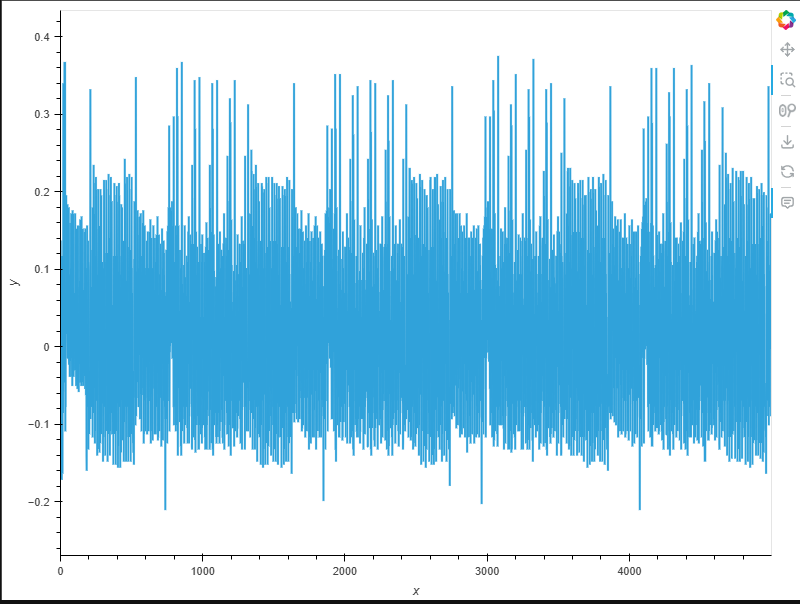
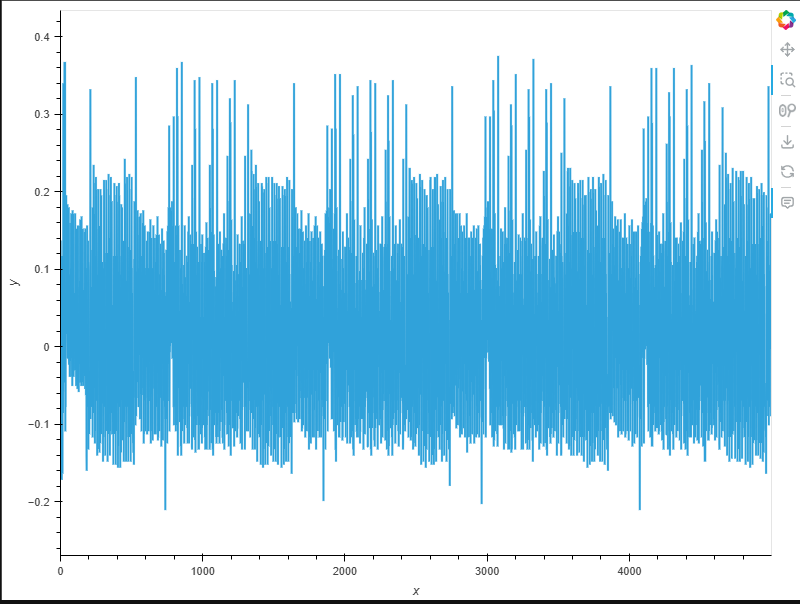

In [16]:
!pip install h5py


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [24]:
import h5py
import numpy as np
import time
import os
from tqdm.notebook import tnrange
from binascii import hexlify
import matplotlib.pyplot as plt

NUM_TRACES = 65536
project_name = "validation_set_2"
implementation = os.path.basename('../../../hardware/victims/firmware/simpleserial-aes')
path = f"traces/{implementation}-{NUM_TRACES}-diff{''}.hdf5"


f = h5py.File(project_name+".hdf5", 'w')

f.attrs["trace_type"] = "profile"
f.attrs["data_type"] = "plaintexts different"
f.attrs["implementation"] = implementation
f.attrs["adc_samples"] = scope.adc.samples

trace_set = f.create_dataset("trace", (NUM_TRACES, scope.adc.samples), dtype=np.int16)
plaintext_set = f.create_dataset("data", (NUM_TRACES, 16), dtype=np.uint8)
key_set = f.create_dataset("key", (NUM_TRACES, 16), dtype=np.uint8)

if "mask" in implementation:
    mask_group = f.create_group("mask")
    keymask_set = mask_group.create_dataset("key", (NUM_TRACES,2), dtype=np.uint32)
    datamask_set = mask_group.create_dataset("data", (NUM_TRACES,), dtype=np.uint32)


Generatin random keys and plaintext, but still using the same key for a specified number of plaintexts. This differs from the training and test set by not balancing the bytearrays.

For the final validation set we generate random keys, to simulate a real world attack where we do not control the key. We do however control the plaintext. From the evaluation of our model we know that it can find the key byte in around 10 traces, which means that we do not have to gather 256 traces per key. For plaintext we will set the plaintext once using ktp.basic.

In [ ]:
ktp = cw.ktp.Basic()
NUM_KEYS = 256
NUM_PT_PER_KEY = 256
#making sure the key and text changes
ktp.fixed_key=False
ktp.fixed_text=True
pt = ktp.next_text()
#We will use capture trace, and scale the traces later
for i in tnrange(NUM_TRACES, desc = "Capturing traces"):
    if i % NUM_KEYS == 0 and i != 0:
        key = ktp.next_key()
        #verifying that the key changes
    trace = None
    while trace is None:
        pt = ktp.next_text()
        trace = cw.capture_trace(scope, target, pt, key, as_int=True)

    #checking that key and plaintext matches
  
    if pt == trace.textin:
        plaintext_set[i] = np.array(trace.textin[:16])
    elif pt != trace.textin:
        print(f"pt does not match, in {pt}, out {trace.textin}")
        break;
    
    if key == trace.key:
        key_set[i] = np.array(trace.key[:16])
    elif key != trace.key:
        print("key does not match")
        break;  
    
    trace_set[i] = trace.wave

Capturing traces:   0%|          | 0/65536 [00:00<?, ?it/s]

CWbytearray(b'd5 23 61 ce a9 3d 4b 90 69 55 46 15 93 10 14 dd')
CWbytearray(b'c3 f6 c7 0c cd 60 90 52 a1 e0 2d 78 c9 2b e3 47')
CWbytearray(b'65 60 3a 23 99 ac e3 90 c0 ef e8 af ff f2 ba ed')
CWbytearray(b'fb 63 73 d9 c9 f1 4c 64 3b 1a c0 92 85 6a d4 6b')
CWbytearray(b'df 70 82 b0 35 fd e3 0d 31 f7 54 0e 3d 87 e5 bc')
CWbytearray(b'd5 8e 54 03 32 a7 34 53 c4 f8 ac 70 5e f7 23 df')
CWbytearray(b'66 22 ce 37 5a bc 0a 72 0f 39 f9 cf 6e 55 05 a7')
CWbytearray(b'46 09 24 a0 00 ae ef b0 f4 a2 79 c8 b4 eb cd 75')
CWbytearray(b'86 f2 0e ce 5d 97 a2 02 c3 bc 75 fd f4 d4 98 4a')
CWbytearray(b'f9 9d d8 79 da 45 f2 d4 05 9a f5 21 de 07 48 dd')
CWbytearray(b'ec 7b f2 e0 53 83 43 f1 65 ee 8f 59 46 23 61 62')
CWbytearray(b'78 74 1d 37 29 0c 00 b7 59 86 cf 18 ad ec 34 83')
CWbytearray(b'f5 3b 5d 48 ce 7e 19 22 07 5b 53 c1 56 3b cc cf')
CWbytearray(b'bd a8 78 34 ba 8c 1f 65 66 c1 ab ab 14 61 ed 66')
CWbytearray(b'2c 2d 34 5a 63 56 d9 0b 88 69 df 1e 45 47 17 ac')
CWbytearray(b'92 11 d9 e8 f4 2f bc 6b 66